In [4]:
!pip install scipy

   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   -- ------------------------------------- 2.6/43.6 MB 16.7 MB/s eta 0:00:03
   ------- -------------------------------- 8.7/43.6 MB 24.4 MB/s eta 0:00:02
   ------------- -------------------------- 15.2/43.6 MB 27.3 MB/s eta 0:00:02
   -------------------- ------------------- 22.3/43.6 MB 28.7 MB/s eta 0:00:01
   -------------------------- ------------- 29.1/43.6 MB 30.3 MB/s eta 0:00:01
   ------------------------------- -------- 34.3/43.6 MB 30.3 MB/s eta 0:00:01
   ------------------------------------- -- 41.2/43.6 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 29.5 MB/s eta 0:00:00


In [5]:
import os 
import pandas as pd 
import scipy.stats as stats
import numpy as np

In [6]:
current_dir = os.getcwd()

# Original Dataset 
filename = '13 million Duolingo student learning traces.csv'
filepath = os.path.normpath(os.path.join(current_dir, '../data/raw/', filename))


chunk_size = 10000
chunks = []

for chunk in pd.read_csv(filepath, chunksize=chunk_size):
    chunk.drop_duplicates(inplace=True)
    chunk.dropna(inplace=True)
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

In [3]:
# Check for na
nan_count = df.isna().sum().sum()
print(f'There are {nan_count} missing values in the dataset')

There are 0 missing values in the dataset


In [4]:
# Check for duplicates
duplicates_count = df.duplicated().sum().sum()
df.drop_duplicates(inplace=True)
print(f'There were {duplicates_count} duplicates in the dataset')

There were 0 duplicates in the dataset


<Axes: >

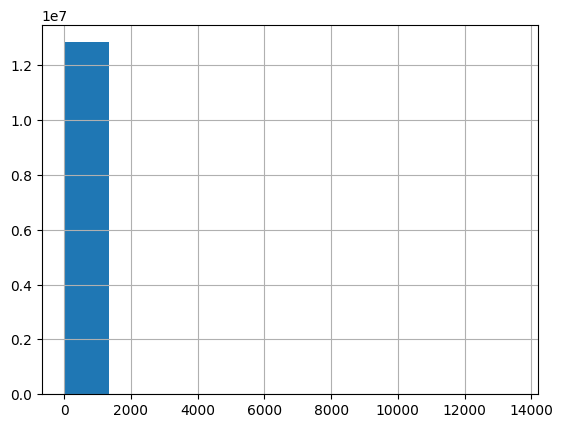

In [9]:
df['history_seen'].hist()

In [7]:
# Outlier using z-score 
# The only outliers we should look at is history_seen, history_correct, delta 

threshold_z = 3
print(df['history_seen'][(np.abs(stats.zscore(df['history_seen'])) < threshold_z)].count())
print(df['history_correct'][(np.abs(stats.zscore(df['history_correct'])) < threshold_z)].count())
print(df['delta'][(np.abs(stats.zscore(df['delta'])) < threshold_z)].count())

12790181
12789624
12595913


In [21]:
# Show the values for 0.9 and 0.99 quantiles 
print(df['history_seen'].quantile(0.9), df['history_seen'].quantile(0.99))
print(round(df['delta'].quantile(0.9),2)/(60*60*60), round(df['delta'].quantile(0.99),2)/(60*60*60))

36.0 237.0
7.910547222222222 52.51042296296296


In [25]:
# Show the values on the edge of z-score  
print(df['history_seen'][(np.abs(stats.zscore(df['history_seen']))>=threshold_z)].min())
print((df['delta'][(np.abs(stats.zscore(df['delta']))>=threshold_z)].min()/(60*60*60)))

411
34.579351851851854


In [28]:
# Show rows higher than 0.9 qunatile 
# df[df['history_seen'] > 36.0] # 1 262 445 rows 

# Show rows higher than 0.99 quantile 
df[df['history_seen'] > 237].head() # 127 979 rows



,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
187,1.0,1362082533,889,u:ezFh,es,en,4bdb859f599fa07dd5eecdab0acc2d34,a/a<pr>,261,229,1,1
188,1.0,1362082533,889,u:ezFh,es,en,41ba24ffb11fd09f5fc715d39cc6c1ea,qué/qué<prn><itg><m><sg>,243,217,1,1
200,1.0,1362082533,889,u:ezFh,es,en,ab724af62c7e36266ef3b66766d47489,te/prpers<prn><pro><p2><mf><sg>,260,220,1,1
206,1.0,1362082533,443,u:ezFh,es,en,c2c8a202a12411858f87d4dcef5b2998,no/no<adv>,463,434,1,1
212,1.0,1362082533,443,u:ezFh,es,en,99cd0848be9239250ffd99e11add7338,de/de<pr>,368,330,1,1


In [34]:
len(df['user_id'].unique()) # there are 115 222 users 

115222

In [15]:
df[df['history_seen'] > 237].groupby(df['user_id']).size().sort_values(ascending=False)   # There are only 1328 users with such score 
# The biggest user with such score has 12 322 rows 

user_id
u:bcH_    12322
u:cpBu     5561
u:goA      3695
u:NPs      3221
u:bkiW     3010
          ...  
u:ih1         1
u:hG1         1
u:dDx5        1
u:dG6         1
u:zz3         1
Length: 1328, dtype: int64

In [16]:
df[df['user_id'] == 'u:bcH_']

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
193803,0.0,1362092353,61015,u:bcH_,en,es,55f383178cf0fdc463ef1ebf91bd288d,milk/milk<n><sg>,157,116,1,0
193804,1.0,1362092353,83142,u:bcH_,en,es,a5acd980d17d726d1c99e7b974d3f52d,for/for<pr>,750,481,1,1
193805,0.0,1362092353,83951,u:bcH_,en,es,9eedd98a29691237d18c127468452836,music/music<n><sg>,181,110,1,0
193806,0.0,1362092353,61191,u:bcH_,en,es,4adf5cd40d521b02a9cc241bf3adc6bb,have/have<vblex><inf>,913,583,1,0
193807,0.0,1362092353,83951,u:bcH_,en,es,b830ca5fa936b0cff94fe712d6847f29,listen/listen<vblex><pres>,93,58,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12504161,1.0,1363066201,2678082,u:bcH_,en,es,6e7589c6b19e910e6f24f8313ab231b9,these/this<prn><tn><mf><pl>,43,33,1,1
12504162,1.0,1363066201,144,u:bcH_,en,es,32d10b7ed0bea958c60a915710434dfe,can/can<vaux><pres>,1166,899,1,1
12504163,0.0,1363066201,454,u:bcH_,en,es,46a16bfbe06339264594d523fb04bf7a,restaurant/restaurant<n><sg>,470,241,1,0
12504164,0.5,1363066201,144,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,5589,3230,2,1


In [ ]:
# Most of the users are "casual": they have low delta between words and low history_seen
# user u:bcH_ doesn't seem like a real user: seeing word have 913 times and only 583 correctly 

In [8]:
# Delete outliers
df_outliers = df[['delta', 'history_seen', 'history_correct']]
z = np.abs(stats.zscore(df_outliers))   


df_after_removal = df[(z < threshold_z).all(axis=1)]


In [40]:
df

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.000000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.000000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.000000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12854140,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,5,4
12854141,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,5,4
12854142,1.000000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,4,4
12854143,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,5,3


In [9]:
df_after_removal

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
7,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,bajo/bajo<pr>,3,3,1,1
8,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,8,6,6,6
9,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,6,5,4,3
10,0.888889,1362082044,5963,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,6,5,9,8
11,0.800000,1362082044,5963,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,8,6,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
12854140,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,5,4
12854141,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,5,4
12854142,1.000000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,4,4
12854143,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,5,3


In [46]:
len(df.index) - len(df_after_removal.index)
# 326 587 rows deleted 

326587

In [53]:
df.iloc[df['history_seen'].idxmax()]

p_recall                                          1.0
timestamp                                  1363095384
delta                                           43225
user_id                                         u:goA
learning_language                                  en
ui_language                                        es
lexeme_id            33a7fd42f74b2d2b1110f1b0c8b6db38
lexeme_string                            not/not<adv>
history_seen                                    13518
history_correct                                 12888
session_seen                                        1
session_correct                                     1
Name: 12720917, dtype: object

In [54]:
df[df['user_id']=='u:goA']

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
483488,0.0,1362109385,92437,u:goA,en,es,0d9244f805fd55af1281a1bcb1a2cba6,and/and<cnjcoo>,2216,2038,1,0
483489,1.0,1362109385,35092,u:goA,en,es,4fbb6a7657b52acc93ffa3b8a2b3bf9d,tomorrow/tomorrow<adv>,328,308,1,1
483490,1.0,1362109385,35345,u:goA,en,es,0bd5d9cd7baaaf384b5344e27d15cecd,food/food<n><sg>,1443,1364,4,4
483491,1.0,1362109385,92437,u:goA,en,es,019e69c0c7349a49fff531b7c5fc263c,have/have<vbhaver><pres><@present_perfect>,1367,1266,1,1
483492,0.0,1362109385,527078,u:goA,en,es,0669084819c5dd99c5f714ab7f672456,box/box<n><sg>,104,103,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12724466,1.0,1363095704,995,u:goA,en,es,0bd5d9cd7baaaf384b5344e27d15cecd,food/food<n><sg>,1517,1433,1,1
12724467,1.0,1363095704,995,u:goA,en,es,2179fd8c281cec0879b28ef81510bf9d,have/have<vblex><pres>,3025,2950,3,3
12724468,1.0,1363095704,172380,u:goA,en,es,32d10b7ed0bea958c60a915710434dfe,can/can<vaux><pres>,840,789,1,1
12724469,1.0,1363095704,474852,u:goA,en,es,20ea5151ddf71842b413fa85663e9a7f,find/find<vblex><pres>,120,118,2,2


In [49]:
df['history_seen'].max()

df_after_removal['history_seen'].max()

np.int64(410)

In [10]:
filepath = os.path.normpath(os.path.join(current_dir, '../data/processed/'))
df_after_removal.to_csv(os.path.join(filepath, 'df_processed.csv'), sep=',', index=False, header=True)